In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings(action='ignore') 
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
from sklearn.linear_model import LinearRegression #모델
from sklearn.model_selection import train_test_split#데이터분할
from sklearn.metrics import mean_squared_error,r2_score #성능지표

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
!git clone https://github.com/taehojo/data.git

df = pd.read_csv('./data/wine.csv',header=None)

fatal: destination path 'data' already exists and is not an empty directory.


In [17]:
X = df.iloc[:,0:12]
y = df.iloc[:,12]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                 shuffle=True)
model = Sequential()

In [18]:
from scipy import optimize


model.add(Dense(30,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

#모델 컴파일
model.compile(loss='binary_crossentropy',optimizer='adam',
              metrics=['accuracy'])
#모델 실행
history = model.fit(X_train,y_train,epochs=50,batch_size=500,
                    validation_split=0.25)#0.8 x 0.25 = 0.2


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.2976 - loss: 1.6384 - val_accuracy: 0.7869 - val_loss: 0.4398
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7843 - loss: 0.4647 - val_accuracy: 0.7846 - val_loss: 0.4982
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7847 - loss: 0.5203 - val_accuracy: 0.7977 - val_loss: 0.4777
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7936 - loss: 0.5004 - val_accuracy: 0.8177 - val_loss: 0.3960
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8173 - loss: 0.4009 - val_accuracy: 0.8500 - val_loss: 0.3258
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8582 - loss: 0.3191 - val_accuracy: 0.8838 - val_loss: 0.2910
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8959 - loss: 0.2869 - val_accuracy: 0.9092 - val_loss: 0.2550
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9139 - loss: 0.2481 - val_accuracy: 0.9200 - val_loss: 0.2213
Epoch 9

In [19]:
score = model.evaluate(X_test,y_test)
print('Test accuracy:',score[1])

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - accuracy: 0.9505 - loss: 0.1259
Test accuracy: 0.9576923251152039


In [24]:
#모델업데이트
from tensorflow.keras.callbacks import ModelCheckpoint


In [39]:
modelpath="./data/model/all/{epoch:02d}-{val_accuracy:.4f}.keras"
checkpointer = ModelCheckpoint(filepath=modelpath,verbose=1)
history = model.fit(X_train,y_train,epochs=500,batch_size=500,
                    #0.8 x 0.25 = 0.2
validation_split=0.25,verbose=0,callbacks=[checkpointer])


Epoch 1: saving model to ./data/model/all/01-0.9754.keras

Epoch 2: saving model to ./data/model/all/02-0.9762.keras

Epoch 3: saving model to ./data/model/all/03-0.9777.keras

Epoch 4: saving model to ./data/model/all/04-0.9762.keras

Epoch 5: saving model to ./data/model/all/05-0.9731.keras

Epoch 6: saving model to ./data/model/all/06-0.9769.keras

Epoch 7: saving model to ./data/model/all/07-0.9777.keras

Epoch 8: saving model to ./data/model/all/08-0.9769.keras

Epoch 9: saving model to ./data/model/all/09-0.9777.keras

Epoch 10: saving model to ./data/model/all/10-0.9731.keras

Epoch 11: saving model to ./data/model/all/11-0.9777.keras

Epoch 12: saving model to ./data/model/all/12-0.9777.keras

Epoch 13: saving model to ./data/model/all/13-0.9785.keras

Epoch 14: saving model to ./data/model/all/14-0.9777.keras

Epoch 15: saving model to ./data/model/all/15-0.9792.keras

Epoch 16: saving model to ./data/model/all/16-0.9785.keras

Epoch 17: saving model to ./data/model/all/17-0.

In [40]:
score=model.evaluate(X_test,y_test)
print('test accurracy:',score[1])

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - accuracy: 0.9878 - loss: 0.0558
test accurracy: 0.989230751991272


In [41]:
hist_df = pd.DataFrame(history.history)


hist_df

,accuracy,loss,val_accuracy,val_loss
0,0.970747,0.085578,0.975385,0.088003
1,0.973826,0.084165,0.976154,0.088464
2,0.976135,0.081467,0.977692,0.086497
3,0.975366,0.081586,0.976154,0.085846
4,0.974596,0.080863,0.973077,0.088089
...,...,...,...,...
495,0.992045,0.027352,0.985385,0.049475
496,0.992302,0.028415,0.987692,0.040937
497,0.991275,0.028624,0.989231,0.040171
498,0.992815,0.026973,0.990769,0.037259


In [42]:
y_vloss = hist_df['val_loss']
y_loss = hist_df['loss']

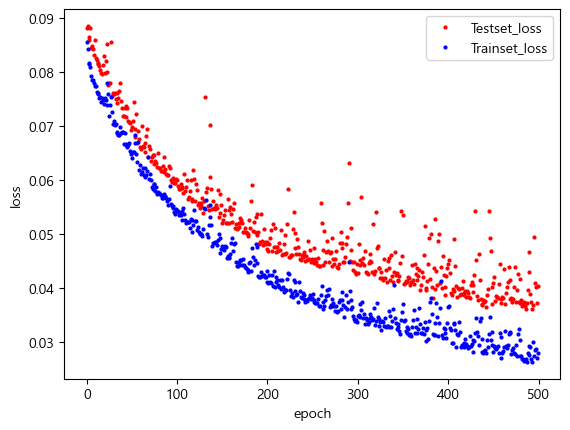

In [43]:
x_len = np.arange(len(y_loss))
plt.plot(x_len,y_vloss,"ro",markersize=2,label='Testset_loss')
plt.plot(x_len,y_loss,"bo",markersize=2,label="Trainset_loss")

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [44]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=20)

In [51]:
modelpath = './data/model/Ch15-house.keras'
checkpointer = ModelCheckpoint(filepath=modelpath,monitor='val_loss',
                              verbose = 0, save_best_only=True)


history = model.fit(X_train,y_train,epochs=2000,batch_size=500,
                    validation_split=0.25,verbose=1,callbacks=[
                        early_stopping_callback,checkpointer
                    ])
#

Epoch 1/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9910 - loss: 0.0324 - val_accuracy: 0.9838 - val_loss: 0.0540
Epoch 2/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9860 - loss: 0.0431 - val_accuracy: 0.9862 - val_loss: 0.0506
Epoch 3/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9921 - loss: 0.0276 - val_accuracy: 0.9908 - val_loss: 0.0380
Epoch 4/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9930 - loss: 0.0245 - val_accuracy: 0.9900 - val_loss: 0.0385
Epoch 5/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9928 - loss: 0.0252 - val_accuracy: 0.9900 - val_loss: 0.0372
Epoch 6/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9927 - loss: 0.0222 - val_accuracy: 0.9892 - val_loss: 0.0404
Epoch 7/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9896 - loss: 0.0299 - val_accuracy: 0.9892 - val_loss: 0.0432
Epoch 8/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9869 - loss: 0.0377 - val_accuracy: 0.9892 - val_loss

In [52]:
score=model.evaluate(X_test,y_test)
print('Test accuracy:',score[1])

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9874 - loss: 0.0535 
Test accuracy: 0.9876922965049744


In [54]:
hist_df = pd.DataFrame(score.history)
hist_df

,accuracy,loss,val_accuracy,val_loss
0,0.992815,0.025891,0.983846,0.054012
1,0.985887,0.043067,0.986154,0.050607
2,0.991532,0.030012,0.990769,0.038000
3,0.993072,0.025687,0.990000,0.038464
4,0.993072,0.026014,0.990000,0.037218
5,0.992302,0.025328,0.989231,0.040386
6,0.989479,0.031422,0.989231,0.043161
7,0.990762,0.031506,0.989231,0.039463
8,0.992815,0.027785,0.987692,0.041918
9,0.993328,0.026771,0.989231,0.040962
